In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data1 = data.drop(["Unnamed: 2",	"Unnamed: 3", "Unnamed: 4"], axis=1)

data1.dropna(how="any", inplace=True, axis=1): This line drops any rows that have missing values in the DataFrame data1 by removing any columns (axis=1) that have at least one missing value (how="any") in place (inplace=True).
data1.columns = ["label", "text"]: This line renames the column names of the DataFrame data1 to "label" and "text" respectively, so that they are easier to understand and work with.

In [ ]:
data1.dropna(how="any", inplace=True, axis=1)
data1.columns = ["label", "text"]
data1.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data1["label_num"] = data1.label.map({"ham" : 0, "spam" : 1})

In [ ]:
data1.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
data1["length"] = data1.text.apply(len)
data1.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
data = data1

Text(0.5, 0, 'Length of Message')

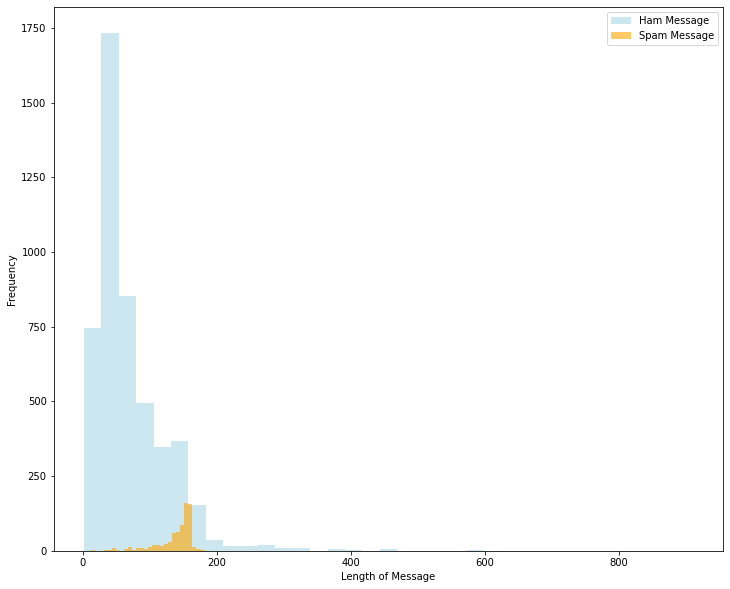

In [ ]:
plt.figure(figsize=(12, 10))

data[data.label == "ham"].length.plot(bins = 35, kind = "hist", color = "lightblue", label = "Ham Message", alpha = 0.6)
data[data.label == "spam"].length.plot(bins = 35, kind = "hist", color = "orange", label = "Spam Message", alpha = 0.6)
plt.legend()
plt.xlabel("Length of Message")


# Processing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In order to improve the accuracy of the model, I decided to incorporate stopwords removal in the text processing step. Stopwords are common words that do not carry much meaning in the context of natural language processing, such as "the", "a", "and", etc. By removing these stopwords, the model can focus more on the important words that can better represent the underlying meaning of the text. In this code, I used the stopwords list from the NLTK library for English language, and also added some domain-specific stopwords to the list. This preprocessing step can greatly improve the performance of the model by reducing noise and increasing the signal-to-noise ratio in the text data.

In [ ]:
import string
from nltk.corpus import stopwords

def text_process(messy):
  STOPWORDS = stopwords.words("english") + ["u", "ü", "u r", "4", "2", "im", "dont", "doin", "ure"]
  nopunc = [char for char in messy if char not in string.punctuation]
  nopunc = "".join(nopunc)

  return " ".join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In the text column of the data DataFrame using the apply method. The text_process function removes punctuations and stopwords from the text, and returns a string of cleaned text.

In [ ]:
data['message'] = data.text.apply(text_process)

This code is used to count the frequency of the most common words in the messages labeled as "ham" (not spam) in a dataset.

First, the code imports the Counter class from the collections module, which will be used to count the frequency of words.

As can seen get, ltgt, ok, go, ur, ill, know... most used words in non-spam messages.

In [ ]:
from collections import Counter

words = data[data.label == "ham"].message.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
  ham_words.update(msg)

print(ham_words.most_common(20))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ur', 240), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160)]


On the other hand, call, free, txt, ur, mobile... are most used words in spam messages.

In [ ]:
words = data[data.label == "spam"].message.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
  spam_words.update(msg)

print(spam_words.most_common(20))

[('call', 347), ('free', 216), ('txt', 150), ('ur', 144), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52)]


# Going deeper

In [ ]:
from sklearn.model_selection import train_test_split

X = data.message
y = data.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

vect.fit(X_train) is used to fit the vectorizer on the training data. It learns the vocabulary of the training data, which is a list of unique words in the text data.

X_train_dtm = vect.transform(X_train) is used to transform the training data into a document-term matrix (DTM) representation, where each row represents a document and each column represents a word in the vocabulary. The values in the matrix are the frequency of the word in the corresponding document.

vect.fit_transform(X_train) combines the above two steps of fitting the vectorizer and transforming the data in one step.

X_test_dtm = vect.transform(X_test) is used to transform the test data into the same DTM representation as the training data, using the vocabulary learned from the training data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(X_train)

X_train_dtm = vect.transform(X_train)

X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)

type(X_train_dtm), X_train_dtm.shape, type(X_test_dtm), X_test_dtm.shape, 


(scipy.sparse._csr.csr_matrix,
 (4179, 7997),
 scipy.sparse._csr.csr_matrix,
 (1393, 7997))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7997 sparse matrix of type '<class 'numpy.float64'>'
	with 35025 stored elements in Compressed Sparse Row format>

# Models

# 1. MultiomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_class = nb.predict(X_test_dtm)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.91      0.93       180

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9827709978463748
=======Confision Matrix===========


array([[1205,    8],
       [  16,  164]])

print message text for false positives (ham incorrectly classifier)

In [ ]:
X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: message, dtype: object

print message text for false negatives (spam incorrectly classifier)


In [ ]:
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: message, dtype: object

In [ ]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9773106164697262

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([("bow", CountVectorizer()),
                  ("tfid", TfidfTransformer()),
                 ("model", MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1213
           1       1.00      0.74      0.85       180

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393

=======Accuracy Score===========
0.9662598707824839
=======Confision Matrix===========


array([[1213,    0],
       [  47,  133]])

# 2. Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear")

logreg.fit(X_train_dtm, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_class = logreg.predict(X_test_dtm)

y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01642414, 0.01439797, 0.07637887, ..., 0.02185762, 0.00506495,
       0.00666546])

In [ ]:
print(classification_report(y_test, y_pred_class))

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1213
           1       1.00      0.88      0.94       180

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.99      0.98      0.98      1393

=======Accuracy Score===========
0.9849246231155779
=======Confision Matrix===========
=======ROC AUC Score===========
0.983305853256389


In the end if wo look after accuracy \
Logistic Regression has 0.9849\
Naive Bayes has 0.98277

but in these kind of project's goal is to get maximum spam messages so on i want to compare recall values of both models;

(Recall of catching spam)

Logistic Reg recall = 0.88\
Naive Bayes recall = 0.91

so on it can possible to select Naive Bayes